In [ ]:
import os

""""
Devo code for all kinds of state space plotting, especially things like dPCA and tsne.

NOTE: previously dPCA plots:
- 240128_snippets_demixed_PCA
- analy_dpca_plot_script.py [More general purpose]
- analyquick_dpca_script_substrokes [Focusing on substrokes]
(Here, try to consolidate all of these things)

"""

In [ ]:
%load_ext autoreload
%autoreload 2


# Load a prviously saved DFallPA
(This saving is only done by hand)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# this is the path to the dataset
# path = '/gorilla1/analyses/recordings/main/RSA/Diego-230615/agg_True-subtr_None-dist_euclidian_unbiased/SP_shape_loc/DFallpa.pkl'
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_samp_and_stroke.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_pig_planning.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_pig_concat_trial_and_stroke_which_levels.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_char_concat_trial_and_stroke_Pancho_230126.pkl"
# path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_shape_loc_Pancho_220715.pkl"

path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_shape_loc_Pancho_220715.pkl"


In [ ]:
DFallpa = pd.read_pickle(path)


# Generate a DFallpa (from Snippets)

In [ ]:
# Char, 
# animal = "Pancho"
# date = 230126
# do_combine = True

# Single prim, novels
animal = "Diego"
# date = 221220
date = 230726
do_combine = False

if do_combine:
    # COMBINE trial and stroke
    dir_suffix = "test"
    question = None
    # q_params = None
    which_level = None
    q_params = {
        "effect_vars": ["seqc_0_shape", "seqc_0_loc"]
    }
    
    combine_trial_and_stroke = True
    
    # PIG
    # question_trial = "PIG_BASE_trial"
    # question_stroke = "PIG_BASE_stroke"
    # check_that_locs_match = True
    
    # CHAR
    question_trial = "CHAR_BASE_trial"
    question_stroke = "CHAR_BASE_stroke"
    check_that_locs_match = True
    check_that_shapes_match = True
else:
    # DONT COMBINE, use questions.
    # question = "CHAR_BASE_trial"
    # question = "PIG_BASE_trial"
    question = "RULE_BASE_stroke"
    # question = "SP_novel_shape"
    # question = "SP_shape_loc"
    # question = "SP_shape_size"
    combine_trial_and_stroke = False
    which_level = "stroke" # Doesnt matter
    dir_suffix = question

    # Load q_params
    from neuralmonkey.analyses.rsa import rsagood_questions_dict, rsagood_questions_params
    q_params = rsagood_questions_dict(animal, date, question)[question]

############### PARAMS
exclude_bad_areas = True
SPIKES_VERSION = "kilosort_if_exists" # since Snippets not yet extracted for ks
combine_into_larger_areas = False
HACK_RENAME_SHAPES = False
list_time_windows = [(-0.6, 0.6)]

########################################## RUN

if combine_trial_and_stroke:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper_combine_trial_strokes
    DFallpa = dfallpa_extraction_load_wrapper_combine_trial_strokes(animal, date, question_trial,
                                                                       question_stroke,
                                                list_time_windows,
                                               combine_into_larger_areas = combine_into_larger_areas,
                                               exclude_bad_areas=exclude_bad_areas,
                                                SPIKES_VERSION="tdt",
                                                HACK_RENAME_SHAPES = HACK_RENAME_SHAPES,
                                                    check_that_shapes_match=check_that_shapes_match,
                                                check_that_locs_match=check_that_locs_match)
else:
    from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper
    DFallpa = dfallpa_extraction_load_wrapper(animal, date, question, list_time_windows,
                                              which_level=which_level,
                                              combine_into_larger_areas = combine_into_larger_areas,
                                              exclude_bad_areas = exclude_bad_areas,
                                              SPIKES_VERSION = SPIKES_VERSION,
                                              HACK_RENAME_SHAPES = HACK_RENAME_SHAPES)

##### To save DFallPA

In [ ]:
# Save it
import pickle
path = "/gorilla4/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_shape_loc_Pancho_220715.pkl"
with open(path, "wb") as f:
    pickle.dump(DFallpa, f)
print("Saved to:", path)


In [ ]:
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import os
SAVEDIR_ANALYSIS = f"{PATH_ANALYSIS_OUTCOMES}/recordings/main/statespacegood"

# PREPROCESS - factorize all relevant labels FIRST here.


In [ ]:
from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

# [PIPELINE] State space plots (tsne)
NOTE: previously have dPCA plots...

### Helper functions for tsne

In [ ]:
from neuralmonkey.analyses.state_space_good import dimredgood_nonlinear_embed_data

In [ ]:
import umap.plot
umap.plot.points(mapper, labels=dflab["seqc_0_shape"], theme="fire")
import umap.plot
umap.plot.points(mapper, labels=dflab["seqc_0_shape"], theme="fire")
umap.plot.connectivity(mapper, show_points=True, edge_bundling='hammer')
umap.plot.diagnostic(mapper, diagnostic_type='pca')

# p = umap.plot.interactive(mapper, labels=dflab["seqc_0_shape"], hover_data=hover_data, point_size=2)
p = umap.plot.interactive(mapper, labels=dflab["seqc_0_shape"], point_size=2)
umap.plot.show(p)

### Extract data

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, trajgood_plot_colorby_splotby_scalar
from pythonlib.tools.pandastools import append_col_with_grp_index
from pythonlib.tools.plottools import savefig
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import os

In [ ]:
SAVEDIR_ANALYSIS = "/tmp"

In [ ]:
fr_normalization_method = "across_time_bins"
# LIST_METHOD = ["umap", "tsne"]
LIST_METHOD = ["umap"]
# LIST_UMAP_N_NEIGHBORS = [10, 30, 50]
LIST_UMAP_N_NEIGHBORS = [30]
exclude_bad_areas = True
SPIKES_VERSION = "tdt" # since Snippets not yet extracted for ks
combine_into_larger_areas = False
list_time_windows = [(-0.6, 0.6)]
pca_frac_var_keep = 0.95


In [ ]:
from neuralmonkey.metadat.analy.anova_params import params_getter_dataset_preprocess

In [ ]:
from neuralmonkey.metadat.analy.anova_params import params_getter_raster_vars

In [ ]:
import neuralmonkey.metadat.analy.anova_params as ap
ap.params_getter_raster_vars

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, trajgood_plot_colorby_splotby_scalar
from pythonlib.tools.plottools import savefig
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import os

if question=="SP_novel_shape":
    TASK_KIND_RENAME_AS_NOVEL_SHAPE=True
else:
    TASK_KIND_RENAME_AS_NOVEL_SHAPE=False

### PARAMS
tbin_dur = 0.1
tbin_slide = 0.1
reshape_method = "trials_x_chanstimes"
RES = []
pca_frac_var_keep = 0.8
for i, row in DFallpa.iterrows():
    pa = row["pa"]
    br = row["bregion"]
    wl = row["which_level"]
    ev = row["event"]
    tw = row["twind"]

    if ev=="03_samp":
        list_twind_overall = [
            [0.2, 0.6]
        ]
    elif ev in ["06_on_strokeidx_0", "00_stroke"]:
        list_twind_overall = [
            [-0.35, -0.05],
            [0, 0.3]
        ]
    elif ev == "04_go_cue":
        list_twind_overall = [
            [-0.45, -0.05]
        ]
    else:
        print(ev)
        assert False

    # if br=="PMv_m" and ev=="06_on_strokeidx_0":
    for twind_overall in list_twind_overall:

        # Extract data
        X, _, pathis, _ = pa.dataextract_state_space_decode_flex(twind_overall, tbin_dur, tbin_slide, reshape_method,
                                                           pca_reduce=True, pca_frac_var_keep=pca_frac_var_keep)
        dflab = pathis.Xlabels["trials"]

        # Extract strokes
        if which_level=="trial":
            # Extract the first stroke...
            STROKES_BEH = [tk.Tokens[0]["Prim"].Stroke() for tk in dflab["Tkbeh_stkbeh"]]
            STROKES_TASK = [tk.Tokens[0]["Prim"].Stroke() for tk in dflab["Tkbeh_stktask"]]
        elif which_level=="stroke":
            STROKES_BEH = [stk() for stk in dflab["Stroke"]]
            STROKES_TASK = [tk.Tokens[0]["Prim"].Stroke() for tk in dflab["TokTask"]]
        else:
            assert False

        # Embed data
        for METHOD in LIST_METHOD:
            if METHOD == "umap":
                list_tsne_perp = ["auto" for _ in range(len(LIST_UMAP_N_NEIGHBORS))]
                list_umap_n_neighbors = LIST_UMAP_N_NEIGHBORS
            else:
                assert False, "add LIST PARAMS for tsne"

            for tsne_perp, umap_n_neighbors in zip(list_tsne_perp, list_umap_n_neighbors):
                Xredu, _ = dimredgood_nonlinear_embed_data(X, METHOD=METHOD, n_components=2, tsne_perp=tsne_perp, umap_n_neighbors=umap_n_neighbors)
                # Xredu = dimredgood_nonlinear_embed_data(X, METHOD=METHOD, n_components=2, tsne_perp="auto", umap_n_neighbors="auto")

                ##### Plot scalars
                savedir = f"{SAVEDIR_ANALYSIS}/{br}-{ev}-twind={'_'.join([str(t) for t in twind_overall])}-METHOD={METHOD}-T_perp={tsne_perp}-U_nn={umap_n_neighbors}"
                print(savedir)
                os.makedirs(savedir, exist_ok=True)

                # Save params
                from pythonlib.tools.expttools import writeDictToTxt
                params_this = {
                    "exclude_bad_areas":exclude_bad_areas,
                    "TASK_KIND_RENAME_AS_NOVEL_SHAPE":TASK_KIND_RENAME_AS_NOVEL_SHAPE,
                    "tbin_dur":tbin_dur,
                    "tbin_slide":tbin_slide,
                    "reshape_method":reshape_method,
                    "X_dim_before_redu_dim": X.shape,
                    "pca_frac_var_keep":pca_frac_var_keep
                }
                writeDictToTxt(params_this, f"{savedir}/params.txt")
                
                if True:
                    from neuralmonkey.metadat.analy.anova_params import params_getter_raster_vars
                    LIST_VAR, LIST_VARS_OTHERS, LIST_OVERWRITE_lenient_n = params_getter_raster_vars(which_level, question)
                    
                    for var, list_var in zip(LIST_VAR, LIST_VARS_OTHERS):
                        list_var_color_var_subplot.append([var, list_var])
                else:                
                    #### DECIDE WHAT VARIABLES TO PLOT
                    # List of plots to make
                    list_var_color_var_subplot = []
                    if which_level=="trial":
                        # list_var_color_var_subplot.append(["seqc_0_shape", "task_kind"])
                        # if len(dflab["gridsize"].unique())>1:
                        #     list_var_color_var_subplot.append(["seqc_0_shape", "gridsize"])
                        #     list_var_color_var_subplot.append(["gridsize", "seqc_0_shape"])
                        #     list_var_color_var_subplot.append(["gridsize", "task_kind"])
                        # if len(dflab["seqc_0_loc"].unique())>1:
                        #     list_var_color_var_subplot.append(["seqc_0_shape", "seqc_0_loc"])
                        #     list_var_color_var_subplot.append(["seqc_0_loc", "seqc_0_shape"])
                        #     list_var_color_var_subplot.append(["seqc_0_loc", "task_kind"])
                        if len(dflab["shape_is_novel_all"].unique())>1:
                            list_var_color_var_subplot.append(["seqc_0_shape", "shape_is_novel_all"])
                            list_var_color_var_subplot.append(["shape_is_novel_all", "seqc_0_shape"])
                            list_var_color_var_subplot.append(["seqc_0_shapesemcat", ("shape_is_novel_all", "task_kind")])
                            list_var_color_var_subplot.append(["seqc_0_angle", ("shape_is_novel_all", "seqc_0_shape")]) # One subplot per shape, use seqc_0_angle is hack-- need a variation in var for this to not be skipped.
                            # list_var_color_var_subplot.append(["shape_is_novel_all", "task_kind"])
                        if "seqc_0_locx" in dflab.columns:
                            list_var_color_var_subplot.append(["seqc_0_locx", "seqc_0_shapeloc"])
                            list_var_color_var_subplot.append(["seqc_0_locy", "seqc_0_shapeloc"])
                            list_var_color_var_subplot.append(["seqc_0_locx", "task_kind"])
                            list_var_color_var_subplot.append(["seqc_0_locy", "task_kind"])
                        if "seqc_0_angle" in dflab.columns:
                            list_var_color_var_subplot.append(["seqc_0_angle", "seqc_0_shapeloc"])
                            list_var_color_var_subplot.append(["seqc_0_angle", "task_kind"])
                        if "seqc_0_angle_binned" in dflab.columns:
                            list_var_color_var_subplot.append(["seqc_0_shape", "seqc_0_angle_binned"])
                        # color by shape semantic category (vlPFC?)
                        # list_var_color_var_subplot.append(["seqc_0_shapesemcat", "task_kind"])
    
                        # (for character)
                        # list_var_color_var_subplot.append(["seqc_0_shape", ("taskconfig_shp_SHSEM", "seqc_0_center_binned", "gridsize", "task_kind")]) # Same image --> diff sequence
    
                        # sequence predictions
                        if False:
                            # list_var_color_var_subplot.append(["seqc_1_shapeloc", ("seqc_0_shapeloc", "task_kind")])
                            list_var_color_var_subplot.append(["seqc_1_shape", ("seqc_0_shapeloc", "seqc_1_loc", "task_kind")])
                            list_var_color_var_subplot.append(["seqc_1_loc", ("seqc_0_shapeloc", "seqc_1_shape", "task_kind")])
                            # list_var_color_var_subplot.append(["seqc_2_shapeloc", ("seqc_0_shapeloc", "seqc_1_shapeloc", "task_kind")])
                            list_var_color_var_subplot.append(["seqc_2_shape", ("seqc_0_shapeloc", "seqc_1_shapeloc", "seqc_2_loc", "task_kind")])
                            list_var_color_var_subplot.append(["seqc_2_loc", ("seqc_0_shapeloc", "seqc_1_shapeloc", "seqc_2_shape", "task_kind")])
                        # (for character)
                        # list_var_color_var_subplot.append(["seqc_1_shape", ("seqc_0_shape", "seqc_0_center_binned", "seqc_1_locon_binned", "task_kind")])
                        # list_var_color_var_subplot.append(["seqc_1_locon_binned", ("seqc_0_shape", "seqc_0_center_binned", "seqc_1_shape", "task_kind")])
                        # list_var_color_var_subplot.append(["seqc_nstrokes_beh", ("seqc_0_shape", "seqc_0_center_binned", "task_kind")])
                        # list_var_color_var_subplot.append(["seqc_nstrokes_beh", ("taskconfig_shp_SHSEM", "seqc_0_shape", "seqc_0_center_binned", "task_kind")]) # Same image --> diff sequence
                        # list_var_color_var_subplot.append(["seqc_nstrokes_beh", "task_kind"])
    
                        # Same image --> diff sequence
                        if False:
                            list_var_color_var_subplot.append(["seqc_0_shapeloc", ("character", "task_kind")])
                            list_var_color_var_subplot.append(["FEAT_num_strokes_beh", ("character", "task_kind")])
                            # list_var_color_var_subplot.append(["FEAT_num_strokes_beh", "task_kind"])
    
                        # Image properties (controlling for beh).
                        if False:
                            list_var_color_var_subplot.append(["taskconfig_shp", ("taskconfig_loc", "seqc_0_shapeloc", "task_kind")])
                            list_var_color_var_subplot.append(["taskconfig_shploc", ("FEAT_num_strokes_task", "seqc_0_shapeloc", "task_kind")])
                            list_var_color_var_subplot.append(["FEAT_num_strokes_task", ("seqc_0_shapeloc", "task_kind")])
                            list_var_color_var_subplot.append(["FEAT_num_strokes_task", "task_kind"])
    
                        # Parse (characters)
                        # list_var_color_var_subplot.append(["taskconfig_shp_SHSEM", ("taskconfig_loc", "task_kind")])
                        # list_var_color_var_subplot.append(["taskconfig_shp_SHSEM", ("taskconfig_loc", "seqc_0_shape", "seqc_0_center_binned", "task_kind")])
                        # list_var_color_var_subplot.append(["taskconfig_shp_SHSEM", ("character", "task_kind")])
                        # list_var_color_var_subplot.append(["taskconfig_shploc_SHSEM", ("taskconfig_loc", "task_kind")])
                        # list_var_color_var_subplot.append(["taskconfig_shploc_SHSEM", ("taskconfig_loc", "seqc_0_shape", "seqc_0_center_binned", "task_kind")])
                        # list_var_color_var_subplot.append(["taskconfig_shploc_SHSEM", ("character", "task_kind")])
                        # list_var_color_var_subplot.append(["taskconfig_shp_SHSEM", "task_kind"])
                        # list_var_color_var_subplot.append(["taskconfig_shploc_SHSEM", "task_kind"])
                        # list_var_color_var_subplot.append(["seqc_1_shape", ("seqc_0_shape", "seqc_0_center_binned", "task_kind")]) # actually, is testing for parsing.
                        # list_var_color_var_subplot.append(["seqc_2_shape", ("seqc_0_shape", "seqc_0_center_binned", "task_kind")]) # actually, is testing for parsing.
    
                        from neuralmonkey.metadat.analy.anova_params import params_getter_decode_vars
                        LIST_VAR_DECODE, LIST_VARS_CONJ, LIST_SEPARATE_BY_TASK_KIND, LIST_FILTDICT, LIST_SUFFIX = params_getter_decode_vars(which_level)
                        single_vars_done = []
                        for list_var_decode, list_vars_conj in zip(LIST_VAR_DECODE, LIST_VARS_CONJ):
                            for var_decode, vars_conj in zip(list_var_decode, list_vars_conj):
                                list_var_color_var_subplot.append([var_decode, tuple(vars_conj)])
                                if var_decode not in single_vars_done:
                                    list_var_color_var_subplot.append([var_decode, "task_kind"])
                                    single_vars_done.append(var_decode)
    
                    elif which_level=="stroke":
                        # shape (effect of shape)
                        # list_var_color_var_subplot.append(["shape", ("CTXT_shapeloc_prev", "gridloc", "CTXT_shapeloc_next", "task_kind")]) # (1) context --> after account for context, not much shape encoding.
                        # list_var_color_var_subplot.append(["shape", ("CTXT_shapeloc_prev", "gridloc", "CTXT_loc_next", "task_kind")])
                        list_var_color_var_subplot.append(["shape", ("CTXT_loc_prev", "gridloc", "task_kind")])
                        # list_var_color_var_subplot.append(["shape", ("stroke_index", "gridloc", "task_kind")]) # effect of stroke index
                        list_var_color_var_subplot.append(["shape", ("stroke_index", "task_kind")]) # important
                        list_var_color_var_subplot.append(["shape", ("stroke_index", "stroke_index_fromlast_tskstks", "task_kind")]) # (1) PMv, shape is invariant, but different for first stroke, (2) preSMA, encode SI indep of shape.
                        list_var_color_var_subplot.append(["shape", "task_kind"])
    
                        # shape (invariance)
                        list_var_color_var_subplot.append(["stroke_index_semantic", ("shape", "task_kind")]) # # also useful to see consistent for shape across contexts.
                        list_var_color_var_subplot.append(["CTXT_ALL_shape", ("shape", "stroke_index_semantic", "task_kind")]) # (1) also useful to see consistent for shape across contexts. (in PMv, not in M1).
                        list_var_color_var_subplot.append(["gridloc", ("shape", "stroke_index_semantic", "task_kind")]) # if many shapes, then this is easier to see if shape is invariant.
                        # list_var_color_var_subplot.append(["task_kind", ("shape", "stroke_index_semantic")]) # if many shapes, then this is easier to see if shape is invariant.
    
                        # location
                        # list_var_color_var_subplot.append(["gridloc", ("CTXT_shapeloc_prev", "shape", "CTXT_shapeloc_next", "task_kind")])
                        # list_var_color_var_subplot.append(["gridloc", ("CTXT_shapeloc_prev", "shape", "CTXT_loc_next", "task_kind")])
                        list_var_color_var_subplot.append(["gridloc", ("CTXT_loc_prev", "shape", "task_kind")])
                        list_var_color_var_subplot.append(["gridloc", ("stroke_index", "shape", "task_kind")])
                        list_var_color_var_subplot.append(["gridloc", "task_kind"])
    
                        # loc (vs. reach direction)
                        list_var_color_var_subplot.append(["gridloc", ("gap_from_prev_angle_binned", "shape", "stroke_index_semantic", "task_kind")]) # control for SIS, since onset reach and offset can be different.
                        list_var_color_var_subplot.append(["gridloc", ("gap_to_next_angle_binned", "shape", "stroke_index_semantic", "task_kind")])
    
                        # state (seq context) (also: prediction)
                        # list_var_color_var_subplot.append(["CTXT_shapeloc_next", ("CTXT_shapeloc_prev", "shape", "gridloc", "task_kind")])
                        # list_var_color_var_subplot.append(["CTXT_shape_next", ("CTXT_shapeloc_prev", "shape", "gridloc", "CTXT_loc_next", "task_kind")])
                        # list_var_color_var_subplot.append(["CTXT_loc_next", ("CTXT_shapeloc_prev", "shape", "gridloc", "CTXT_shape_next", "task_kind")])
                        # list_var_color_var_subplot.append(["CTXT_shapeloc_prev", ("CTXT_shapeloc_next", "shape", "gridloc", "task_kind")])
                        # list_var_color_var_subplot.append(["CTXT_loc_next", "task_kind"])
                        # list_var_color_var_subplot.append(["CTXT_shape_next", "task_kind"])
    
                        # list_var_color_var_subplot.append(["CTXT_shapeloc_next", ("CTXT_shapeloc_prev", "shape", "gridloc", "stroke_index_semantic", "task_kind")]) # important to have SIS, to separate (shapeloc) from END.
                        list_var_color_var_subplot.append(["CTXT_shapeloc_next", ("CTXT_loc_prev", "shape", "gridloc", "stroke_index_semantic", "task_kind")])  # important to have SIS, to separate (shapeloc) from END.
                        list_var_color_var_subplot.append(["CTXT_loc_next", ("CTXT_loc_prev", "shape", "gridloc", "stroke_index_semantic", "CTXT_shape_next", "task_kind")])
                        if False: # just get fewer plots
                            list_var_color_var_subplot.append(["CTXT_shape_next", ("CTXT_shapeloc_prev", "shape", "gridloc", "CTXT_loc_next", "stroke_index_semantic", "task_kind")]) # important to have SIS, to separate (shapeloc) from END.
                            list_var_color_var_subplot.append(["CTXT_loc_next", ("CTXT_shapeloc_prev", "shape", "gridloc", "CTXT_shape_next", "stroke_index_semantic", "task_kind")]) # important to have SIS, to separate (shapeloc) from END.
    
                        # list_var_color_var_subplot.append(["CTXT_shapeloc_prev", ("CTXT_shapeloc_next", "shape", "gridloc", "stroke_index_semantic", "task_kind")]) # important to have SIS, to separate (shapeloc) from END.
                        list_var_color_var_subplot.append(["CTXT_shapeloc_prev", ("shape", "gridloc", "stroke_index_semantic", "task_kind")]) # important to have SIS, to separate (shapeloc) from END.
                        # list_var_color_var_subplot.append(["CTXT_shapeloc_prev", ("shape", "gridloc", "task_kind")]) # also useful to see consistent for shape across contexts.
    
                        list_var_color_var_subplot.append(["CTXT_shapeloc_prev", "task_kind"])
                        list_var_color_var_subplot.append(["CTXT_shapeloc_next", "task_kind"])
                        list_var_color_var_subplot.append(["CTXT_loc_next", "task_kind"])
    
                        # stroke index (effect)
                        # list_var_color_var_subplot.append(["stroke_index", ("CTXT_shapeloc_prev", "shape", "gridloc", "CTXT_shapeloc_next", "task_kind")])
                        # list_var_color_var_subplot.append(["stroke_index", ("shape", "gridloc", "CTXT_shapeloc_next", "task_kind")])
                        list_var_color_var_subplot.append(["stroke_index", ("CTXT_loc_prev", "shape", "gridloc", "task_kind")])
                        list_var_color_var_subplot.append(["stroke_index", ("stroke_index_semantic", "task_kind")]) # Important: showing that PMv has no stroke effect if exclude first stroke
                        list_var_color_var_subplot.append(["stroke_index", ("FEAT_num_strokes_task", "task_kind")]) # Important: is counting, or internal ,etc.
                        list_var_color_var_subplot.append(["stroke_index", "task_kind"])
    
                        # list_var_color_var_subplot.append(["stroke_index_fromlast_tskstks", ("CTXT_shapeloc_prev", "shape", "gridloc", "CTXT_shapeloc_next", "task_kind")]) # SI - Good (strongest control)
                        list_var_color_var_subplot.append(["stroke_index_fromlast_tskstks", ("CTXT_loc_prev", "shape", "gridloc", "task_kind")])
                        list_var_color_var_subplot.append(["stroke_index_fromlast_tskstks", ("stroke_index_semantic", "task_kind")]) # Important: showing that PMv has no stroke effect if exclude first stroke
                        list_var_color_var_subplot.append(["stroke_index_fromlast_tskstks", "task_kind"])
    
                        list_var_color_var_subplot.append(["CTXT_ALL_MAX", ("stroke_index_fromlast_tskstks", "task_kind")]) # Strong, test context vs. SI
                        list_var_color_var_subplot.append(["CTXT_shapeloc_next", ("CTXT_shapeloc_prev", "stroke_index_fromlast_tskstks", "task_kind")]) # Strong, test context vs. SI
    
                        # stroke index (invariance)
                        list_var_color_var_subplot.append(["shape_loc", ("stroke_index", "task_kind")]) # (1) Stroke index invariant to shape/loc (2) Consistent across task_kind
    
                        # contrast stroke index vs. stroke index from last
                        if False: # too messy
                            list_var_color_var_subplot.append(["stroke_index", ("shape", "gridloc", "stroke_index_fromlast_tskstks", "task_kind")])
                            list_var_color_var_subplot.append(["stroke_index_fromlast_tskstks", ("shape", "gridloc", "stroke_index", "task_kind")])
    
                        # task kind
                        list_var_color_var_subplot.append(["task_kind", ("shape", "gridloc", "CTXT_shapeloc_prev")])
    
                        # num strokes in task
                        list_var_color_var_subplot.append(["FEAT_num_strokes_task", ("shape", "gridloc", "CTXT_shapeloc_prev")])
    
                    else:
                        print(which_level)
                        assert False

                # Cleanup, if forgot to add taskkind
                tmp = []
                for var_color, var_subplot in list_var_color_var_subplot:
                    if not var_color == "task_kind":
                        if isinstance(var_subplot, (list, tuple)) and not any([v=="task_kind" for v in var_subplot]):
                            var_subplot = tuple(list(var_subplot) + ["task_kind"])
                        elif isinstance(var_subplot, str) and not var_subplot=="task_kind":
                            var_subplot = tuple([var_subplot, "task_kind"])
                        elif var_subplot is None:
                            var_subplot = "task_kind"
                    tmp.append([var_color, var_subplot])
                list_var_color_var_subplot = tmp

                if False:
                    ##### Create meaned data to plot
                    effect_vars = ["seqc_0_shape", "seqc_0_loc", "shape_is_novel_all", "seqc_0_shapesem", "seqc_0_locon_binned", "seqc_0_angle_binned"]
                    pathis_meaned = pathis.slice_and_agg_wrapper("trials", effect_vars)

                for var_color, var_subplot in list_var_color_var_subplot:
                    from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER
                    trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, var_color, savedir,
                                             vars_subplot=var_subplot, list_dims=[(0,1)],
                                             STROKES_BEH=STROKES_BEH, STROKES_TASK=STROKES_TASK)


In [ ]:
# TODO:
# - collect all --> 1 figure for each bregion, etc.
# - Other datasets:
# - novel prims
# ---- sim structure
# ---- novel cluster together?
# - shape vs. size
# - PIG
# - char

###### Plot overlaying stroke drawing associated with each shape [DONE, moved above]

In [ ]:
# Extract strokes
# from pythonlib.tools.stroketools import strokes_alignonset, strokes_centerize
import matplotlib.pyplot as plt
# strokes_ver = "beh"
STROKES_BEH = [tk.Tokens[0]["Prim"].Stroke() for tk in dflab["Tkbeh_stkbeh"]]
STROKES_TASK = [tk.Tokens[0]["Prim"].Stroke() for tk in dflab["Tkbeh_stktask"]] 
    

In [ ]:
xs = Xredu[:,0]
ys = Xredu[:,1]
labels_color = dflab[var_color].tolist()
labels_color = np.random.rand(len(xs))
# text_to_plot = labels_color
text_to_plot = None
labels_subplot = dflab[var_subplot].tolist()

fig, axes, map_levo_to_ax, map_levo_to_inds = trajgood_plot_colorby_splotby_scalar(xs, ys, labels_color, labels_subplot, var_color, var_subplot, SIZE=7,
                                                       overlay_mean=True, text_to_plot=text_to_plot,
                                                                                          STROKES_BEH=STROKES_BEH, STROKES_TASK=STROKES_TASK)

# from pythonlib.tools.pandastools import grouping_append_and_return_inner_items
# grpdict = grouping_append_and_return_inner_items(dflab, [var_color, var_subplot])
# levels_var_color = dflab[var_color].unique().tolist()
# 
# for strokes, align_to, pcol in [
#     [STROKES_BEH, "onset", "k"],
#     [STROKES_TASK, "center", "m"]
# ]:
#     if False:
#         # Overlay nplot random strokes
#         ax = axes.flatten()[0]
#         nplot = 40
#         overlay_stroke_on_plot_mult_rand(strokes, xs, ys, nplot, align_to)
#     
#     # Overlay random strokes, sampling within each level of labels_color
#     nplot = 4
#     for levo, ax in map_levo_to_ax.items():
#         for lev in levels_var_color:
#             inds = grpdict[lev, levo]
#             overlay_stroke_on_plot_mult_rand([strokes[i] for i in inds], xs[inds], ys[inds], nplot, align_to, color=pcol)
        

In [ ]:

def overlay_stroke_on_plot_mult_rand(strokes, xs, ys, nrand=10, align_to="onset", color=None):
    import random

    inds = range(len(strokes))

    if len(inds)>nrand:
        inds = random.sample(inds, nrand)

    for i in inds:
        strok = strokes[i][:, :2]
        # times = strokes[i][:, 2]
        x = xs[i]
        y = ys[i]
        overlay_stroke_on_plot(strok, x, y, ax, align_to=align_to, color=color)
        

def overlay_stroke_on_plot(strok, x, y, ax, SIZE = 0.05, align_to="onset", color=None):
    """
    PARAMS:
    - SIZE, frac of screen to make the size of the strok.
    """
    
    if color is None:
        color="k"
    from pythonlib.tools.stroketools import strokes_bounding_box_dimensions
    # Get dimensions of figure, so can correctly scale stroke
    XLIM = ax.get_xlim()
    YLIM = ax.get_ylim()
    xdiff = XLIM[1] - XLIM[0]
    ydiff = YLIM[1] - YLIM[0]
    d_ax = (xdiff**2 + ydiff**2)**0.5 
        
    # Decide if align at onset (beh) or center (task)
    from pythonlib.tools.stroketools import strokes_alignonset, strokes_centerize
    import matplotlib.pyplot as plt
    if align_to == "onset":
        strok = strokes_alignonset([strok])[0]
    elif align_to == "center":
        strok = strokes_centerize([strok])[0]
    elif align_to is None:
        pass
    else:
        print(align_to)
        assert False
            
    # Rescale stroke
    w, h, d = strokes_bounding_box_dimensions([strok])
    rescale = SIZE * d_ax/d 
    aspect = [1, ydiff/xdiff] 
    strok = strok * rescale # rescale to page
    strok = strok * aspect # to make sure strok aspect is visually accurate
    strok = strok + [x,y] # move to location
    
    # Plot
    ax.plot(strok[:,0], strok[:,1], '-', alpha=0.7, color=color)
    # ax.scatter(strok[:,0], strok[:,1], c=times)
    # if align_to=="onset":
    ax.plot(x, y, 'o', mfc="none", alpha=0.4, color=color)
        
    


In [ ]:
dflab["Tkbeh_stktask"].values[0].Tokens[0]["Prim"].Stroke()

In [ ]:
# load DS for this animal on this day
 # Load a daily dataset
from pythonlib.dataset.dataset import load_dataset_notdaily_helper, load_dataset_daily_helper

D = load_dataset_daily_helper(animal, date)

In [ ]:
from pythonlib.dataset.dataset_strokes import preprocess_dataset_to_datstrokes, DatStrokes
# DS = DatStrokes(D)
DS = preprocess_dataset_to_datstrokes(D, "all_no_abort_superv")

In [ ]:
best_n_by_dist = 15
DS.distgood_compute_beh_task_strok_distances()
dfdat = DS.features_generate_dataset_mean_primshape("shape", best_n_by_dist=best_n_by_dist)


In [ ]:
shape = "novelprim--6288514134535433462-90-3.4-0.9"
inds = DS.find_indices_this_shape(shape)
titles = [DS.stroke_shape_align_flip_vs_task(i) for i in inds] 
DS.plot_multiple_overlay_entire_trial(inds, overlay_beh_or_task="task", titles=titles);


In [ ]:
# Given a shape, extract strokes and task
shape = "circle-67-6.0-0.4"
n = 5
inds = DS.find_indices_this_shape(shape)
# pick n random inds
import random
inds = random.sample(inds, n)

strokes_beh = DS.extract_strokes(inds=inds, ver_behtask="beh")
strokes_task = DS.extract_strokes(inds=inds, ver_behtask="task_aligned_single_strok")

# for all beh, align to stroke onset
from pythonlib.tools.stroketools import strokes_alignonset
import matplotlib.pyplot as plt
strokes_beh = strokes_alignonset(strokes_beh)

fig, ax = plt.subplots()

XLIM = ax.get_xlim()
YLIM = ax.get_ylim()
xdiff = XLIM[1] - XLIM[0]
ydiff = YLIM[1] - YLIM[0]
strokes_beh = [[x, y] + strok[:,:2] * xdiff/ydiff for strok in strokes_beh]
# strok[:,0] =  strok[:,0] * xdiff/ydiff # so it looks correct even if aspect is not 1
# strok = strok + loc # move to new locatin

# plot at that location, starting from strok onset
for strok in strokes_beh:
    ax.plot(strok[:,0], strok[:,1], '-')
    ax.plot(strok[0,0], strok[0,1], 'ok')



In [ ]:
from pythonlib.drawmodel.strokePlots import plotDatStrokes
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plotDatStrokes([strok], ax)

In [ ]:
# var_color = "seqc_0_shape"
var_color = "seqc_0_anglebinned"
# var_color = "seqc_0_loconbinned"
var_subplot = "shape_is_novel_all"

xs = Xtsne[:,0]
ys = Xtsne[:,1]
labels_color = dflab[var_color].tolist()
labels_subplot = dflab[var_subplot].tolist()
fig, axes= trajgood_plot_colorby_splotby_scalar(xs, ys, labels_color, labels_subplot, var_color, var_subplot, SIZE=7,
                                                       overlay_mean=False, text_to_plot=labels_color,
                                                       strokes_to_overlay=strokes_to_overlay)

In [ ]:
dflab["seqc_0_shape"]

In [ ]:
shapes = dflab["shap"]

In [ ]:
DS.Version

In [ ]:


pa.Xlabels["trials"].keys()

In [ ]:
xs = Xtsne[:,0]
ys = Xtsne[:,1]
labels_color = dflab[var_color].tolist()
labels_subplot = dflab[var_subplot].tolist()
fig, axes= trajgood_plot_colorby_splotby_scalar(xs, ys, labels_color, labels_subplot, var_color, var_subplot, SIZE=4);

In [ ]:
# Plot, subsampling to N trials for each level

##### Plot trajectories

In [ ]:


# INPUT PARAMS
var_color_by = "seqc_0_shape"
var_subplots = "seqc_0_loc"

# Runs
# 1) Construct dataframe
# df = pa.dataextract_split_by_label_grp_for_statespace(grpvars)
grpvars = [var_color_by, var_subplots]
labels = pa.Xlabels["trials"].loc[:, grpvars] 
labelvars = grpvars
df = trajgood_construct_df_from_raw(X, pa.Times, labels, labelvars)

# 2) Plot
dims = (2,3) # pairs of dimensions to plot
times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
times_to_mark_markers = ["d"] # mark with a diamond ("d")
time_bin_size = 0.05 # to make plot easier to visaulize, you can bin in time.
trajgood_plot_colorby_splotby(df, var_color_by, var_subplots, dims, "traj", mean_over_trials=True,
                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                              time_bin_size=time_bin_size)

In [ ]:
bregion = "PMv_m"
twind = (-0.6, 0.6)
event = "03_samp"


In [ ]:
DFallpa

# [DEVO] A single bregion UMAP

In [ ]:
savedir = "/tmp"

In [ ]:
date

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, trajgood_plot_colorby_splotby_scalar
from neuralmonkey.analyses.state_space_good import dimredgood_nonlinear_embed_data
from pythonlib.tools.plottools import savefig
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import os

# # -- Which variables to plot
# list_var_color_var_subplot = []
# # list_var_color_var_subplot.append(["chunk_within_rank_semantic", ("chunk_rank", "shape", "task_kind")])
# list_var_color_var_subplot.append([("shape", "chunk_within_rank"), ("taskcat_by_rule", "task_kind")])
# list_var_color_var_subplot.append([("chunk_rank", "chunk_within_rank"), ("taskcat_by_rule", "task_kind")])

connect_means_with_line = True
var_color = ["chunk_rank", "chunk_within_rank"]
var_subplot = ["taskcat_by_rule", "task_kind"]
var_lines = ["chunk_rank", "chunk_within_rank"]

### PARAMS
# -- which dataset
bregion = "preSMA_a"
twind = (-0.6, 0.6)
which_level = "stroke"
event = "00_stroke"

# -- data representation
METHOD = "umap"
twind_overall = [-0.1, 0.1]
tbin_dur = 0.1
tbin_slide = 0.1
reshape_method = "trials_x_chanstimes"
RES = []
pca_frac_var_keep = 0.8

# -- umap
tsne_perp = "auto"
umap_n_neighbors = 50

##### Plots copied from above (no lines connecting means)

In [ ]:

# Extract a single pa
from neuralmonkey.classes.population_mult import extract_single_pa
pa = extract_single_pa(DFallpa, bregion, twind, which_level, event)

# Extract data
X, _, pathis, _ = pa.dataextract_state_space_decode_flex(twind_overall, tbin_dur, tbin_slide, reshape_method,
                                                   pca_reduce=True, pca_frac_var_keep=pca_frac_var_keep)
dflab = pathis.Xlabels["trials"]

Xredu, reducer = dimredgood_nonlinear_embed_data(X, METHOD=METHOD, n_components=2, tsne_perp=tsne_perp, umap_n_neighbors=umap_n_neighbors)
# Xredu = dimredgood_nonlinear_embed_data(X, METHOD=METHOD, n_components=2, tsne_perp="auto", umap_n_neighbors="auto")

# for var_color, var_subplot in list_var_color_var_subplot:
#     from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER
#     trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, var_color, savedir,
#                              vars_subplot=var_subplot, list_dims=[(0,1)])


# 1. sort so that connects lines in order
# dflab_sorted = dflab.sort_values(var_color)
# connect_means_with_line_levels = [grp[0] for grp in dflab_sorted.groupby(list(var_color))]
if isinstance(var_lines, (list, tuple)):
    from pythonlib.tools.pandastools import append_col_with_grp_index
    dflabthis = append_col_with_grp_index(dflabthis, var_lines, "_tmp")
    connect_means_with_line_levels = sorted(dflabthis["_tmp"].unique().tolist())
else:
    connect_means_with_line_levels = sorted(dflabthis["var_lines"].unique().tolist())

from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER
trajgood_plot_colorby_splotby_scalar_WRAPPER(xthis, dflabthis, var_color, savedir,
                         vars_subplot=var_subplot, list_dims=[(0,1)], connect_means_with_line=connect_means_with_line,
                                      connect_means_with_line_levels=connect_means_with_line_levels,
                                             overlay_mean=True, overlay_mean_var_color="chunk_rank", 
                                             alpha=0.3)


### Variations of plot, e.g., taking mean over trials, and so on

In [ ]:
                if False:
                    ##### Create meaned data to plot
                    effect_vars = ["seqc_0_shape", "seqc_0_loc", "shape_is_novel_all", "seqc_0_shapesem", "seqc_0_locon_binned", "seqc_0_angle_binned"]
                    pathis_meaned = pathis.slice_and_agg_wrapper("trials", effect_vars)


In [ ]:
# Plot a sequence of mean states

sequence = [
    ()
]


In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:
# given a single state, plot its mean and/or scatter.
Xin = Xredu.T[:, :, None]
pathis_redu = pathis.copy_replacing_X(Xin)

In [ ]:
_vars = []
if isinstance(var_color, (list, tuple)):
    _vars += var_color
else:
    _vars += [var_color]

_vars += list(var_subplot)

print(_vars)

In [ ]:
list_var_color_var_subplot = []
list_var_color_var_subplot.append([("chunk_rank", "chunk_within_rank"), ("taskcat_by_rule", "task_kind")])


In [ ]:
Xredu.shape

In [ ]:
# Extract data
# X, _, pathis, _ = pa.dataextract_state_space_decode_flex(twind_overall, tbin_dur, tbin_slide, reshape_method,
#                                                    pca_reduce=True, pca_frac_var_keep=pca_frac_var_keep)
# dflab = pathis.Xlabels["trials"]
# 
# 
# Xredu, reducer = dimredgood_nonlinear_embed_data(X, METHOD=METHOD, n_components=2, tsne_perp=tsne_perp, umap_n_neighbors=umap_n_neighbors)
# Xredu = dimredgood_nonlinear_embed_data(X, METHOD=METHOD, n_components=2, tsne_perp="auto", umap_n_neighbors="auto")

connect_means_with_line = True
var_color = ["chunk_rank", "chunk_within_rank"]
var_subplot = ["taskcat_by_rule", "task_kind"]
var_lines = ["chunk_rank", "chunk_within_rank"]


# Extract data
# Extract a single pa
from neuralmonkey.classes.population_mult import extract_single_pa
pa = extract_single_pa(DFallpa, bregion, twind, which_level, event)

# Extract data
X, _, pathis, _ = pa.dataextract_state_space_decode_flex(twind_overall, tbin_dur, tbin_slide, reshape_method,
                                                   pca_reduce=True, pca_frac_var_keep=pca_frac_var_keep)
dflab = pathis.Xlabels["trials"]

if False:
    # UMAP
    Xredu, reducer = dimredgood_nonlinear_embed_data(X, METHOD=METHOD, n_components=2, tsne_perp=tsne_perp, umap_n_neighbors=umap_n_neighbors)
elif False:
    # PCA
    from neuralmonkey.analyses.state_space_good import dimredgood_pca
    Xredu, Xpca, pca = dimredgood_pca(X, n_components=2)
    Xredu = Xredu[:, [2,3]]

if False:
    # given a single state, plot its mean and/or scatter.
    Xin = Xredu.T[:, :, None]
    pathis_redu = pathis.copy_replacing_X(Xin)
    
    # Take average embedding over vars
    _vars = []
    if isinstance(var_color, (list, tuple)):
        _vars += var_color
    else:
        _vars += [var_color]
    _vars += list(var_subplot)
    pa_agg = pathis_redu.slice_and_agg_wrapper("trials", _vars)
    
    # Extract one datapt per condition (trial-averaged)
    dflabthis = pa_agg.Xlabels["trials"]
    xthis = pa_agg.X.squeeze(axis=2).T # (ntrials, ndims)
else:
    dflabthis = dflab
    xthis = Xredu
    
# 1. sort so that connects lines in order
# dflab_sorted = dflab.sort_values(var_color)
# connect_means_with_line_levels = [grp[0] for grp in dflab_sorted.groupby(list(var_color))]
if isinstance(var_lines, (list, tuple)):
    from pythonlib.tools.pandastools import append_col_with_grp_index
    dflabthis = append_col_with_grp_index(dflabthis, var_lines, "_tmp")
    connect_means_with_line_levels = sorted(dflabthis["_tmp"].unique().tolist())
else:
    connect_means_with_line_levels = sorted(dflabthis["var_lines"].unique().tolist())

from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER
trajgood_plot_colorby_splotby_scalar_WRAPPER(xthis, dflabthis, var_color, savedir,
                         vars_subplot=var_subplot, list_dims=[(0,1)], connect_means_with_line=connect_means_with_line,
                                      connect_means_with_line_levels=connect_means_with_line_levels,
                                             overlay_mean=True, overlay_mean_var_color="chunk_rank", 
                                             alpha=0.3)


In [ ]:
from neuralmonkey.scripts.analyquick_dpca_script_substrokes import dpca_compute_pa_to_space
from neuralmonkey.analyses.rsa import preprocess_rsa_prepare_popanal_wrapper



In [ ]:
# effect_vars = ["chunk_rank", "chunk_within_rank", "taskcat_by_rule", "task_kind"]
# pa, res_check_tasksets, res_check_effectvars = preprocess_rsa_prepare_popanal_wrapper(pa, effect_vars, False, False, 1, 20)

# if effect_vars == ["shape"]:
#     marginalization="s"
# elif effect_vars == ["dist_angle"]:
#     marginalization="m"
# else:
#     assert False

# Compute dPCs, and project data.
keep_all_margs = True
dpca, Z, R, trialR, map_var_to_lev, map_grp_to_idx, params_dpca, panorm = dpca_compute_pa_to_space(pa, effect_vars, keep_all_margs=keep_all_margs)


In [ ]:
Xredu

# Comparing to PCA and dPCA

# SCRATCH - loading old DFallpa (for Dolnik, checking bug)

In [1]:
import pandas as pd
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/CORRUPTED/DFallpa.pkl"
path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_KS.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_raw.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_2.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_3.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/DFallpa_4.pkl"
# path = "/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/for_xuan/DFallpa_shape_loc_Pancho_220715.pkl"
DFallpa = pd.read_pickle(path)

In [11]:
DFallpa.loc[:, ["bregion", "event"]]

,bregion,event
0,M1_m,03_samp
1,M1_l,03_samp
2,PMv_l,03_samp
3,PMv_m,03_samp
4,PMd_p,03_samp
5,PMd_a,03_samp
6,dlPFC_a,03_samp
7,vlPFC_p,03_samp
8,vlPFC_a,03_samp
9,FP_p,03_samp


In [10]:
# for ind in range(len(DFallpa)):
SORT_DFLAB_BY_TRIALCODE = False
ind = 2
var = "seqc_0_shape"
var_others = ["seqc_0_loc"]
chans_keep = [1058,  1059, 1063, 1067, 1070, 1080, 1093, 1090, 1089, 1087, 1086, 1082, 1078, 1076]

# ind = 6
# var = "seqc_0_loc"
# var_others = ["seqc_0_shape"]

pa = DFallpa["pa"].values[ind]
X = pa.X
dflab = pa.Xlabels["trials"]

if chans_keep is not None and len(chans_keep)>0:
    indskeep = [i for i, c in enumerate(pa.Chans) if c in chans_keep]
    X = X[indskeep, :, :]

if SORT_DFLAB_BY_TRIALCODE:
    def F(x):
        return [trialcode_to_tuple(tc) for tc in x]
    
    # sort by trialcode... is this was messed things up?
    def trialcode_to_tuple(tc):
        from pythonlib.tools.stringtools import decompose_string
        a,b,c = decompose_string(tc)
        return (int(a), int(b), int(c))
    
    dflab = dflab.sort_values("trialcode", axis=0, key=F).copy().reset_index(drop=True)

import numpy as np
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, dimredgood_pca, trajgood_plot_colorby_splotby_scalar_WRAPPER
    
import os
savedir = f"/tmp/ind{ind}"
os.makedirs(savedir, exist_ok=True)

Xscal = np.mean(X[:, :, 90:150], axis=2)
Xpcakeep, Xpca, pca = dimredgood_pca(Xscal.T, method="sklearn")
print(Xpcakeep.shape)
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xpcakeep, dflab, var, savedir, vars_subplot=var_others)

(424, 9)
fig: /tmp/ind2/color=seqc_0_shape-sub=seqc_0_loc-dims=(0, 1).pdf
Saving ...  /tmp/ind2/color=seqc_0_shape-sub=seqc_0_loc-dims=(0, 1).pdf


In [ ]:
dflab["trialcode"]

In [13]:
pa.Times[90:150]


array([0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175, 0.185,
       0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265, 0.275,
       0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355, 0.365,
       0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445, 0.455,
       0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535, 0.545,
       0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625, 0.635,
       0.645, 0.655, 0.665, 0.675, 0.685, 0.695])

In [7]:
indskeep = [i for i, c in enumerate(pa.Chans) if c in chans_keep]
X = X[indskeep, :, :]



array([[0.18995, 0.07176, 0.23217, 1.     ],
       [0.24427, 0.60937, 0.99697, 1.     ],
       [0.27597, 0.97092, 0.51653, 1.     ],
       [0.88331, 0.86553, 0.21719, 1.     ],
       [0.94084, 0.35566, 0.07031, 1.     ],
       [0.4796 , 0.01583, 0.01055, 1.     ]])

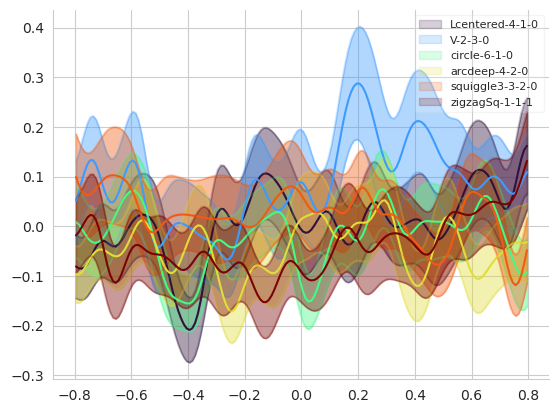

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
pa.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape", ax=ax, chan=1058)

##### Dolnik version (raw)

In [ ]:
X = DFallpa["DATA_chan_trial_time"].values[ind]
dflab = DFallpa["labels"].values[ind]
chans = DFallpa["chans"].values[ind]
times = DFallpa["times"].values[ind]
trials = DFallpa["trials"].values[ind]


In [ ]:
X.shape

In [ ]:
assert X.shape == (len(chans), len(trials), len(times))


In [ ]:
print(X.shape)

In [ ]:
vars = ["seqc_0_shape", "seqc_0_loc"]
labels = [tuple(x) for x in dflab.loc[:, vars].values]

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, dimredgood_pca, trajgood_plot_colorby_splotby_scalar_WRAPPER

In [ ]:

df = trajgood_construct_df_from_raw(X, times, labels, vars)
trajgood_plot_colorby_splotby(df, vars[0], vars[1], dims=(4,5), time_bin_size=0.1)


##### Plot scalars

In [ ]:
import numpy as np
Xscal = np.mean(X[:, :, 90:150], axis=2)
Xpcakeep, Xpca, pca = dimredgood_pca(Xscal.T, method="sklearn")
Xpcakeep.shape

In [ ]:
trajgood_plot_colorby_splotby_scalar_WRAPPER(Xpcakeep, dflab, "seqc_0_shape", "/tmp", vars_subplot=["seqc_0_loc"])

##### Using pa version

In [ ]:
ind = 2

In [ ]:
pa = DFallpa["pa"].values[ind]

In [ ]:
X = pa.X
dflab = pa.Xlabels["trials"]

In [ ]:
X.shape

In [ ]:
dflab["seqc_0_shape"]

In [ ]:
dflab["trialcode"]

In [ ]:
[col for col in dflab.columns if "trial" in col]

In [ ]:
pa.Trials

In [ ]:
pa.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape")